In [1]:
import io
import sys
import pandas as pd
import numpy as np
from Pipeline import DPA
import os
from sklearn.preprocessing import StandardScaler
sys.path.append('../')
from simulate_frbs import *
import umap

In [2]:
directories = [
    "correct_noise_simple_broad",
    "correct_noise_simple_narrow",
    "correct_noise_scattered",
    "correct_noise_complex",
    "correct_noise_drifting"
]

data = []

for directory in directories:
    data_dir = f"/Users/dirkkuiper/Documents/MacBookProDocuments/University/Thesis/Rep_Learn_FRB/{directory}"
    data_per_directory = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".npy"):
            dyn_spec = np.load(os.path.join(data_dir, filename))
            scaler = StandardScaler()
            data_per_directory.append(scaler.fit_transform(dyn_spec))

    data_per_directory = np.array(data_per_directory).reshape(-1, 1024 * 512)[:100]
    data.append(data_per_directory)

# Combine the data from all directories into one array
combined_data = np.concatenate(data, axis=0)

# Reshape the combined data for DPA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

In [3]:
# Create a UMAP model
umap_model = umap.UMAP(n_components=2)

# Fit and transform the data
umap_result = umap_model.fit_transform(combined_data_2d)

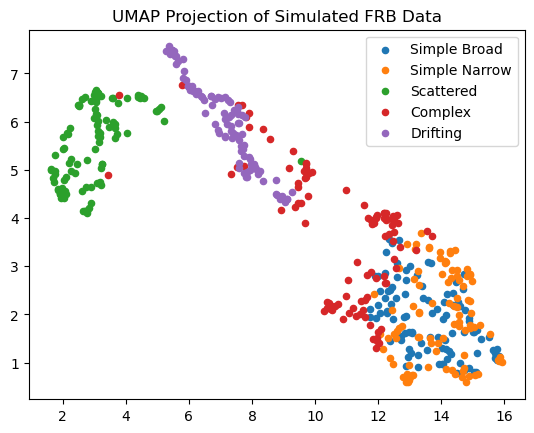

In [4]:
# Define labels for each directory
labels = [
    "Simple Broad",
    "Simple Narrow",
    "Scattered",
    "Complex",
    "Drifting"
]

# Create a scatter plot where points are colored by directory labels
for i, label in enumerate(directories):
    num_samples = data[i].shape[0]
    start_idx = sum(len(data[j]) for j in range(i))
    end_idx = start_idx + num_samples
    plt.scatter(umap_result[start_idx:end_idx, 0], umap_result[start_idx:end_idx, 1], label=labels[i], s=20)

plt.legend()
plt.title('UMAP Projection of Simulated FRB Data')
plt.show()

## UMAP 3 components

In [5]:
# Create a UMAP model
umap_model = umap.UMAP(n_components=3)

# Fit and transform the data
umap_result = umap_model.fit_transform(combined_data_2d)

MovieWriter imagemagick unavailable; using Pillow instead.


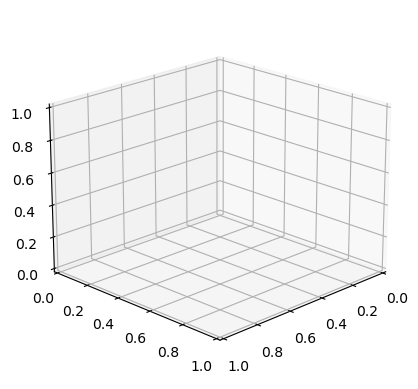

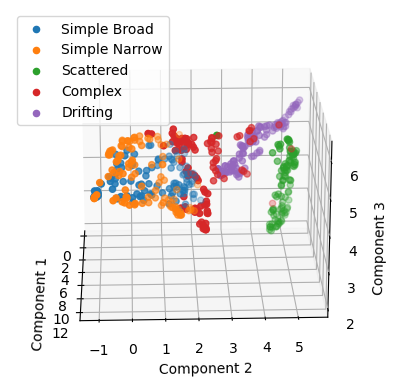

In [6]:
from matplotlib.animation import FuncAnimation

# Separate the transformed data back into classes
umap_per_directory = []
for i in range(len(directories)):
    num_samples = data[i].shape[0]
    start_idx = sum(len(data[j]) for j in range(i))
    end_idx = start_idx + num_samples
    umap_per_directory.append(umap_result[start_idx:end_idx, :])

# Create a 3D scatter plot for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Customize the view angle
ax.view_init(elev=20, azim=45)  # Adjust the elevation and azimuth angles

labels = [
    "Simple Broad",
    "Simple Narrow",
    "Scattered",
    "Complex",
    "Drifting"
]


# Create a 3D scatter plot
def update_angle(frame):
    ax.cla()
    ax.view_init(elev=20, azim=frame)
    for i, label in enumerate(directories):
        ax.scatter(
            umap_per_directory[i][:, 0], umap_per_directory[i][:, 1], umap_per_directory[i][:, 2],
            label=labels[i]
        )
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Initialize FuncAnimation
ani = FuncAnimation(fig, update_angle, frames=np.arange(0, 360, 2), repeat=True)

# Save the animation as a GIF
ani.save('umap_animation_correct_noise.gif', writer='imagemagick', fps=15)

plt.show()